In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import tensorflow as tf
from tensorflow import keras

2021-11-17 21:49:54.655106: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-17 21:49:54.655270: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_gen = ImageDataGenerator()

train_ds = train_gen.flow_from_directory(
    './train',
    target_size=(150, 150),
    batch_size=20,
    class_mode = 'binary'
)

Found 20000 images belonging to 2 classes.


In [4]:
train_ds.class_indices

{'cats': 0, 'dogs': 1}

In [5]:
#idem for validation data
val_gen = ImageDataGenerator()

val_ds = val_gen.flow_from_directory(
    './validation',
    target_size=(150, 150),
    batch_size=20,
    class_mode = 'binary',
    shuffle=False
)

Found 5000 images belonging to 2 classes.


In [27]:
# neural network architecture (functional style)

inputs = keras.Input(shape=(150, 150, 3))

inner = keras.layers.Conv2D(32, 3, activation='relu')(inputs)
inner2 = keras.layers.MaxPooling2D(pool_size=(2, 2))(inner)
vectors = keras.layers.Flatten()(inner2)
inner3 = keras.layers.Dense(64, activation='relu')(vectors)
outputs = keras.layers.Dense(1, activation='sigmoid')(inner3)

model = keras.Model(inputs, outputs)

In [28]:
optimizer = keras.optimizers.SGD(
    learning_rate=0.002, 
    momentum=0.8
)

loss = keras.losses.BinaryCrossentropy()
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [29]:
history = model.fit(
    train_ds, 
    epochs=10, 
    validation_data=val_ds
)

Epoch 1/10
1000/1000 [==============================] - 232s 229ms/step - loss: 0.6538 - accuracy: 0.6037 - val_loss: 0.6469 - val_accuracy: 0.6022
Epoch 2/10
1000/1000 [==============================] - 186s 185ms/step - loss: 0.5937 - accuracy: 0.6791 - val_loss: 0.5694 - val_accuracy: 0.7062
Epoch 3/10
1000/1000 [==============================] - 195s 195ms/step - loss: 0.5386 - accuracy: 0.7308 - val_loss: 0.5197 - val_accuracy: 0.7388
Epoch 4/10
1000/1000 [==============================] - 197s 197ms/step - loss: 0.4886 - accuracy: 0.7642 - val_loss: 0.5160 - val_accuracy: 0.7402
Epoch 5/10
1000/1000 [==============================] - 209s 209ms/step - loss: 0.4427 - accuracy: 0.7953 - val_loss: 0.5267 - val_accuracy: 0.7484
Epoch 6/10
1000/1000 [==============================] - 190s 190ms/step - loss: 0.3898 - accuracy: 0.8261 - val_loss: 0.5824 - val_accuracy: 0.7178
Epoch 7/10
1000/1000 [==============================] - 191s 191ms/step - loss: 0.3298 - accuracy: 0.8583 - val_

In [30]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 175232)            0         
                                                                 
 dense_2 (Dense)             (None, 64)                11214912  
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                           

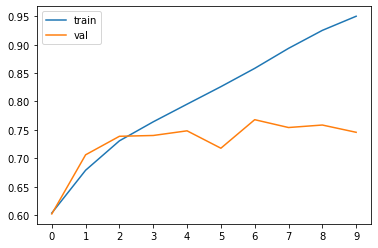

In [31]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

### 2nd round

In [32]:
gen = ImageDataGenerator(
    rescale=1./255
)

train_ds = gen.flow_from_directory(
    './train',
    target_size=(150, 150),
    batch_size=20,
    class_mode = 'binary'
)

val_ds = gen.flow_from_directory(
    './validation',
    target_size=(150, 150),
    batch_size=20,
    class_mode = 'binary',
    shuffle=False
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [33]:
history2 = model.fit(
    train_ds,
    steps_per_epoch=100,
    epochs=10,
    validation_data=val_ds,
    validation_steps=50
)

Epoch 1/10
100/100 [==============================] - 23s 227ms/step - loss: 0.1064 - accuracy: 0.9760 - val_loss: 0.9819 - val_accuracy: 0.6730
Epoch 2/10
100/100 [==============================] - 23s 232ms/step - loss: 0.0949 - accuracy: 0.9780 - val_loss: 0.3961 - val_accuracy: 0.8610
Epoch 3/10
100/100 [==============================] - 23s 225ms/step - loss: 0.0991 - accuracy: 0.9705 - val_loss: 0.3743 - val_accuracy: 0.8690
Epoch 4/10
100/100 [==============================] - 23s 234ms/step - loss: 0.0959 - accuracy: 0.9730 - val_loss: 0.6936 - val_accuracy: 0.7640
Epoch 5/10
100/100 [==============================] - 24s 240ms/step - loss: 0.0922 - accuracy: 0.9770 - val_loss: 0.8486 - val_accuracy: 0.7250
Epoch 6/10
100/100 [==============================] - 24s 239ms/step - loss: 0.0737 - accuracy: 0.9860 - val_loss: 0.6819 - val_accuracy: 0.7670
Epoch 7/10
100/100 [==============================] - 23s 228ms/step - loss: 0.0907 - accuracy: 0.9765 - val_loss: 0.4964 - val_ac

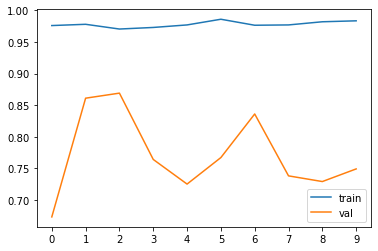

In [41]:
plt.plot(history2.history['accuracy'], label='train')
plt.plot(history2.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

In [35]:
from scipy import stats

stats.describe(np.array(history2.history['accuracy']))

DescribeResult(nobs=10, minmax=(0.9704999923706055, 0.9860000014305115), mean=0.977949994802475, variance=2.2191695600189595e-05, skewness=0.23760920156369453, kurtosis=-0.7140653799876469)

In [36]:
# median of training accuracy
np.median(history2.history['accuracy'])

0.9769999980926514

In [37]:
# standard deviation of training loss
np.std(history2.history['loss'])

0.010215202646401854

### 3rd round

In [39]:
gen2 = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )

train_ds = gen2.flow_from_directory(
    './train',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
    )

val_ds = gen2.flow_from_directory(
    './validation',
    target_size=(150, 150),
    batch_size=20,
    shuffle=False,
    class_mode='binary'
    )

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [40]:
history3 = model.fit(
    train_ds,
    steps_per_epoch=100,
    epochs=10,
    validation_data=val_ds,
    validation_steps=50
)

Epoch 1/10
100/100 [==============================] - 29s 286ms/step - loss: 0.6930 - accuracy: 0.6355 - val_loss: 0.8398 - val_accuracy: 0.4080
Epoch 2/10
100/100 [==============================] - 30s 297ms/step - loss: 0.6146 - accuracy: 0.6550 - val_loss: 0.6254 - val_accuracy: 0.6780
Epoch 3/10
100/100 [==============================] - 34s 336ms/step - loss: 0.6128 - accuracy: 0.6635 - val_loss: 0.4836 - val_accuracy: 0.8300
Epoch 4/10
100/100 [==============================] - 27s 270ms/step - loss: 0.5818 - accuracy: 0.6910 - val_loss: 0.5934 - val_accuracy: 0.6920
Epoch 5/10
100/100 [==============================] - 28s 274ms/step - loss: 0.5690 - accuracy: 0.6925 - val_loss: 1.0079 - val_accuracy: 0.3900
Epoch 6/10
100/100 [==============================] - 28s 280ms/step - loss: 0.5723 - accuracy: 0.7055 - val_loss: 0.5238 - val_accuracy: 0.7770
Epoch 7/10
100/100 [==============================] - 28s 280ms/step - loss: 0.6022 - accuracy: 0.6745 - val_loss: 0.6281 - val_ac

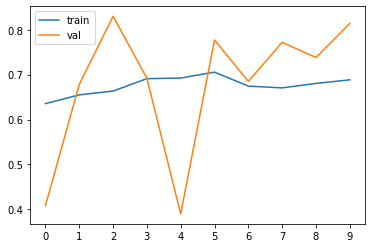

In [42]:
plt.plot(history3.history['accuracy'], label='train')
plt.plot(history3.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

In [43]:
np.mean(history3.history['val_loss'])

0.6280792862176895

In [44]:
np.average(history3.history['val_accuracy'][5:])

0.7572000026702881